## **Predictive Modeling for Crop Recommendation Using Soil Fertility Parameters**
                

# **PROJECT DESCRIPTION**

A farmer reached out to you as a machine learning expert seeking help to select the best crop for his field. Due to budget constraints, the farmer explained that he could only afford to measure one out of the four essential soil measures:

1. Nitrogen content ratio in the soil
2. Phosphorous content ratio in the soil
3. Potassium content ratio in the soil
4. pH value of the soil

The expert realized that this is a classic feature selection problem, where the objective is to pick the most important feature that could help predict the crop accurately. Can you help him?

# **FEATURES Description**
1. "N"	Nitrogen content ratio in the soil
2. "P"	Phosphorous content ratio in the soil
3. "K"	Potassium content ratio in the soil
4. "pH"	PH value of the soil
5. "crop"	categorical values that contain various crops (target variable).

In [142]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [1]:
import kagglehub
path = kagglehub.dataset_download("mohamedmostafa259/soil-measures")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\mohamedmostafa259\soil-measures\versions\1


Importing Libraries

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import metrics

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

Importing dataset from Kaggle

In [3]:
crops = pd.read_csv(r"G:\Other computers\My Laptop\Desktop\PYTHON SANDBOX\soil_measures.csv")
crops

NameError: name 'pd' is not defined

##DATA PREPROCESSING

In [ ]:
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [ ]:
crops.tail()

,N,P,K,ph,crop
2195,107,34,32,6.780064,coffee
2196,99,15,27,6.086922,coffee
2197,118,33,30,6.362608,coffee
2198,117,32,34,6.758793,coffee
2199,104,18,30,6.779833,coffee


In [2]:
crops.shape

NameError: name 'crops' is not defined

In [ ]:
#Checking for missing values
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [ ]:
#Checking for duplicated rows
crops.duplicated().sum()    

np.int64(0)

In [ ]:
#Getting more information about the dataset
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [ ]:
crops.nunique()

N        137
P        117
K         73
ph      2200
crop      22
dtype: int64

In [ ]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [ ]:
# info about the dataset
crops.info

<bound method DataFrame.info of         N   P   K        ph    crop
0      90  42  43  6.502985    rice
1      85  58  41  7.038096    rice
2      60  55  44  7.840207    rice
3      74  35  40  6.980401    rice
4      78  42  42  7.628473    rice
...   ...  ..  ..       ...     ...
2195  107  34  32  6.780064  coffee
2196   99  15  27  6.086922  coffee
2197  118  33  30  6.362608  coffee
2198  117  32  34  6.758793  coffee
2199  104  18  30  6.779833  coffee

[2200 rows x 5 columns]>

## **EXPLORATORY DATA ANALYSIS**

**CORRELATION MATRIX HEATMAP**

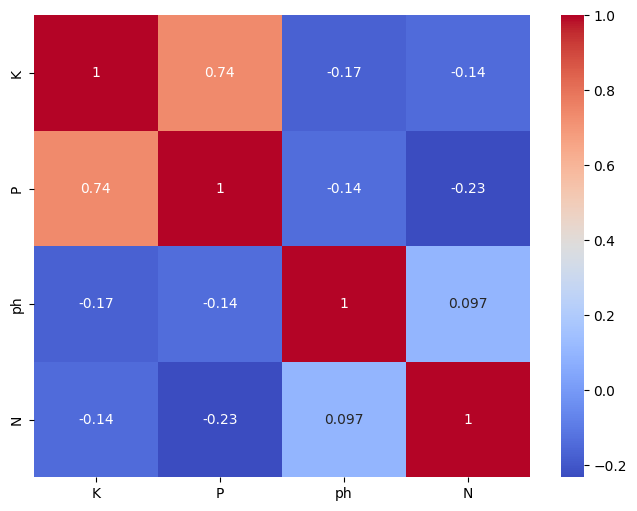

In [146]:
crops[['K', 'P', 'ph', 'N']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(crops[['K', 'P', 'ph', 'N']].corr(), annot=True, cmap='coolwarm')  
plt.show()

**VISUALIZATION USING PAIRPLOT**

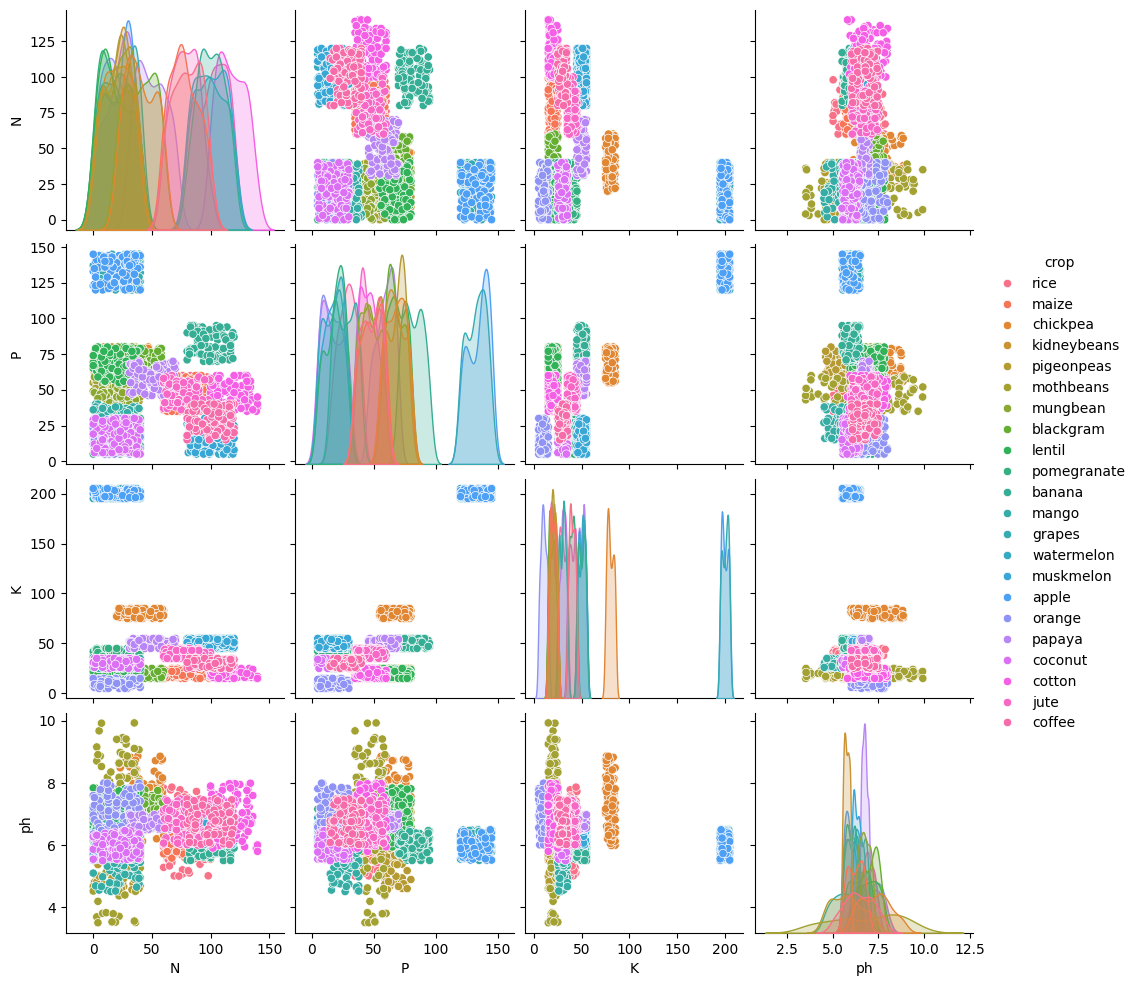

In [147]:
sns.pairplot(crops, hue="crop", palette="husl")
plt.show()

In [148]:
pip install dtale

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


What is D-Tale?

D-Tale (pronounced “detail”) is a Python library that provides an interactive, spreadsheet-like interface for exploring pandas DataFrames directly from your Jupyter Notebook or Python script.

Think of it as the Python equivalent of R’s View(), but much more powerful — it combines the simplicity of Excel-like browsing with the functionality of pandas.

In [137]:
import dtale
dtale.show(crops)

**CONVERTING CATEGORICAL VARIABLE INTO NUMERICAL**

In [149]:
# Encoding the target variable 'crop'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
crops['crop'] = le.fit_transform(crops['crop'])
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,20
1,85,58,41,7.038096,20
2,60,55,44,7.840207,20
3,74,35,40,6.980401,20
4,78,42,42,7.628473,20


## **ANOVA ANALYSIS**

In [139]:
#importing statsmodels for statistical analysis
!pip install statsmodels
import statsmodels.api as sm



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [150]:
#Performing ANOVA to see the significance of each feature
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Example: crop ~ N + P + K + ph
model = ols('crop ~ N + P + K + ph', data=crops).fit()

anova_results = anova_lm(model)
print(anova_results)

              df        sum_sq       mean_sq           F         PR(>F)
N            1.0     85.814440     85.814440    2.908948   8.823078e-02
P            1.0  23223.584948  23223.584948  787.235903  2.718907e-148
K            1.0     74.817669     74.817669    2.536178   1.114078e-01
ph           1.0    412.932185    412.932185   13.997625   1.877371e-04
Residual  2195.0  64752.850759     29.500160         NaN            NaN


In [ ]:
# Formatting the ANOVA results into a readable table
anova_table = anova_results.reset_index()
anova_table.rename(columns={'index': 'Variable'}, inplace=True)

print(anova_table)

   Variable      df        sum_sq       mean_sq           F         PR(>F)
0         N     1.0     85.814440     85.814440    2.908948   8.823078e-02
1         P     1.0  23223.584948  23223.584948  787.235903  2.718907e-148
2         K     1.0     74.817669     74.817669    2.536178   1.114078e-01
3        ph     1.0    412.932185    412.932185   13.997625   1.877371e-04
4  Residual  2195.0  64752.850759     29.500160         NaN            NaN


In [151]:
summary = anova_table[['Variable', 'F', 'PR(>F)']]
print(summary)

   Variable           F         PR(>F)
0         N    2.908948   8.823078e-02
1         P  787.235903  2.718907e-148
2         K    2.536178   1.114078e-01
3        ph   13.997625   1.877371e-04
4  Residual         NaN            NaN


**BAR PLOT FOR THR P VALUE**

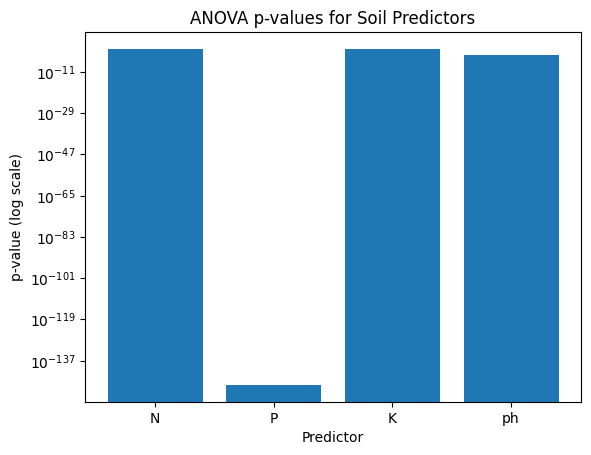

In [183]:
# Visualizing the ANOVA results for P values
plt.bar(anova_plot['Variable'], anova_plot['PR(>F)'])
plt.yscale("log")
plt.xlabel("Predictor")
plt.ylabel("p-value (log scale)")
plt.title("ANOVA p-values for Soil Predictors")
plt.show()

**BARPLOT FOR F VALUE**

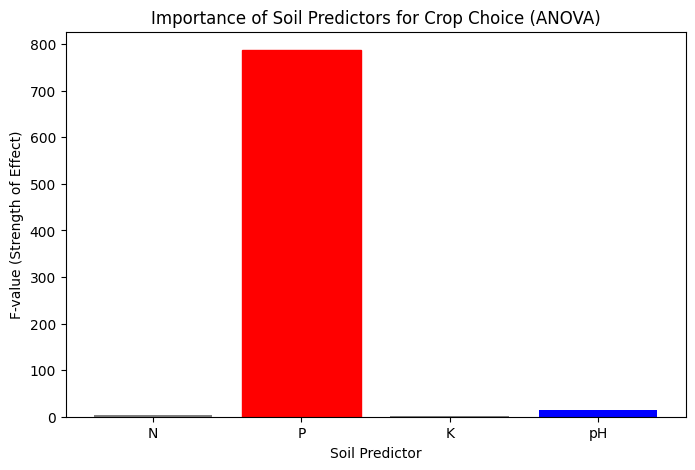

In [153]:
predictors = ['N', 'P', 'K', 'pH']
f_values   = [2.91, 787.24, 2.53, 14.0]

# Create a bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(predictors, f_values, color=['gray','green','gray','blue'])

# Highlight the most important predictor
bars[1].set_color('red')  # P is the strongest

plt.xlabel('Soil Predictor')
plt.ylabel('F-value (Strength of Effect)')
plt.title('Importance of Soil Predictors for Crop Choice (ANOVA)')
plt.show()

In [154]:
# Check how many crops we have, i.e., multi-class target
crops.crop.unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

**Checking for Outliers using BOXPlOT**

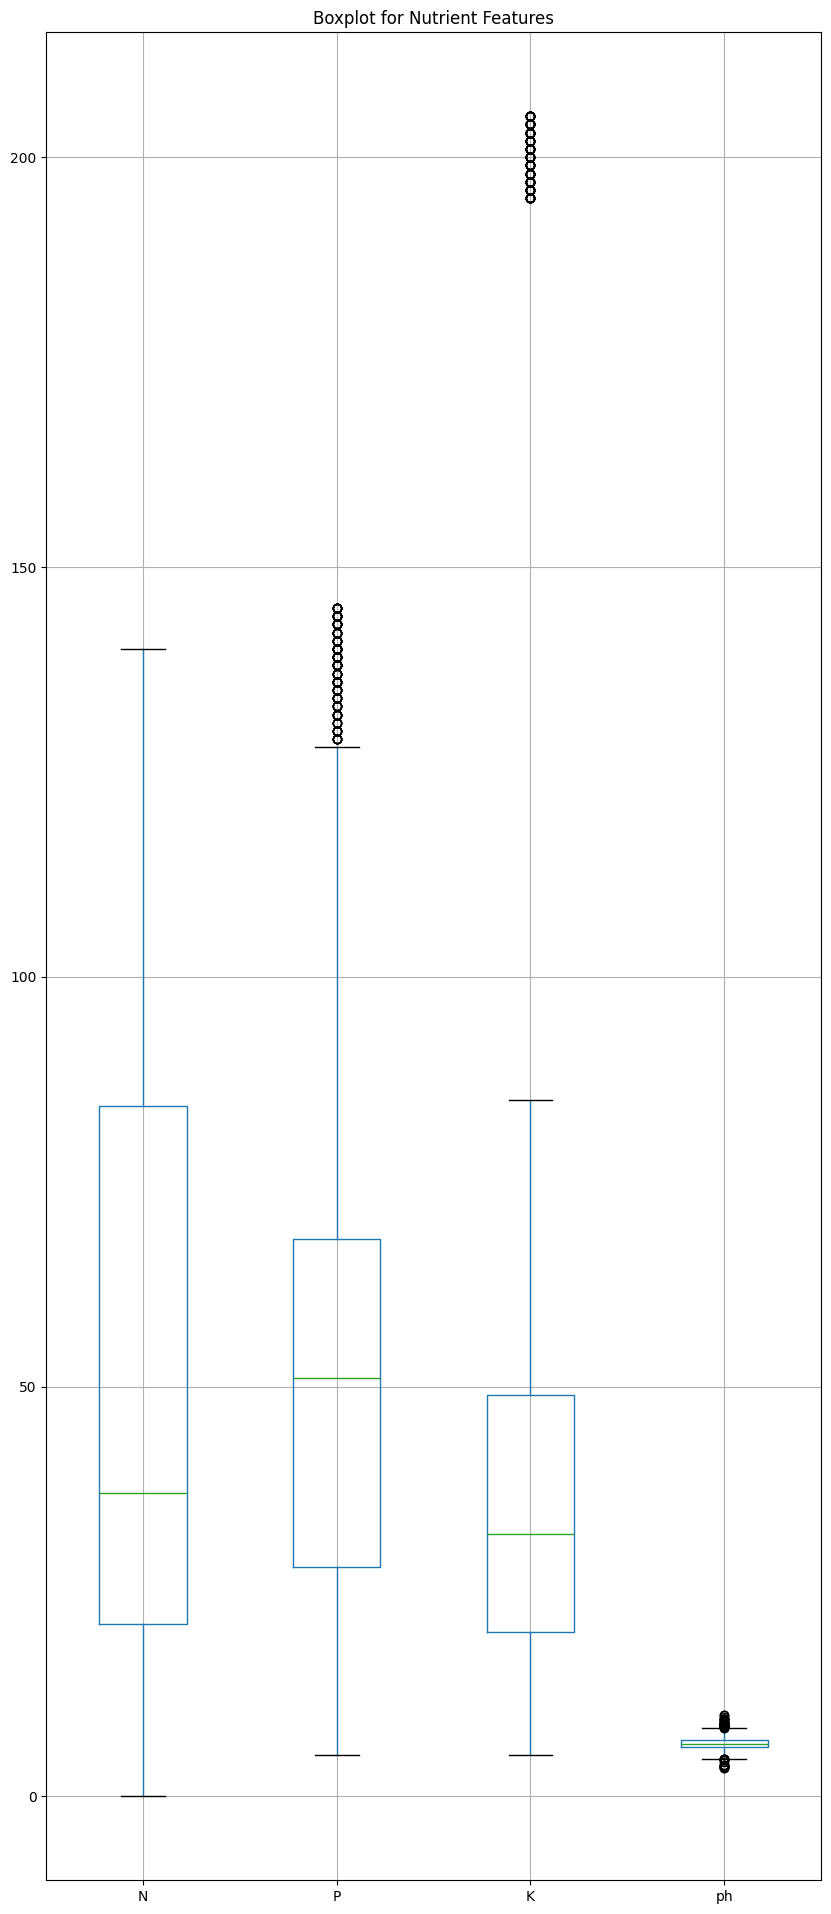

In [155]:
crops.boxplot(column=['N', 'P', 'K', 'ph'], figsize=(10,24))   
plt.title("Boxplot for Nutrient Features")
plt.show()     

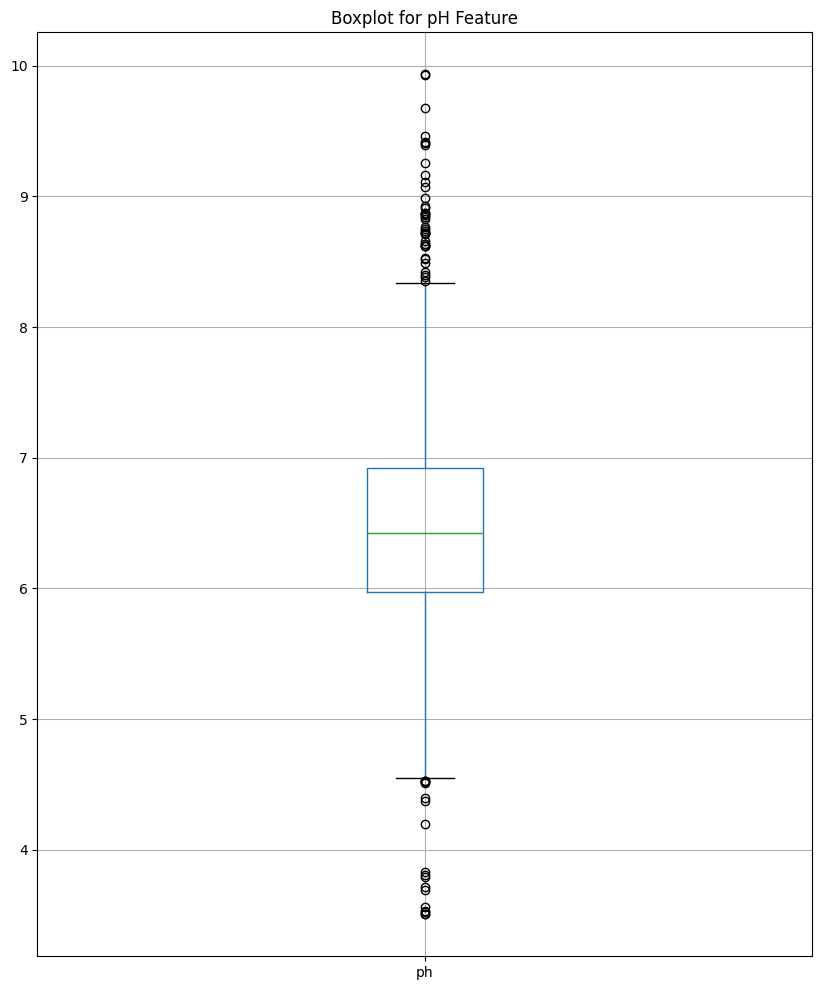

In [ ]:
# Boxplot for pH feature for better visibility
crops.boxplot(column=['ph'], figsize=(10,12))
plt.title("Boxplot for pH Feature")
plt.show()

**HISTOGRAM FOR DISTRIBUTION ACROSS EACH FEATURES**

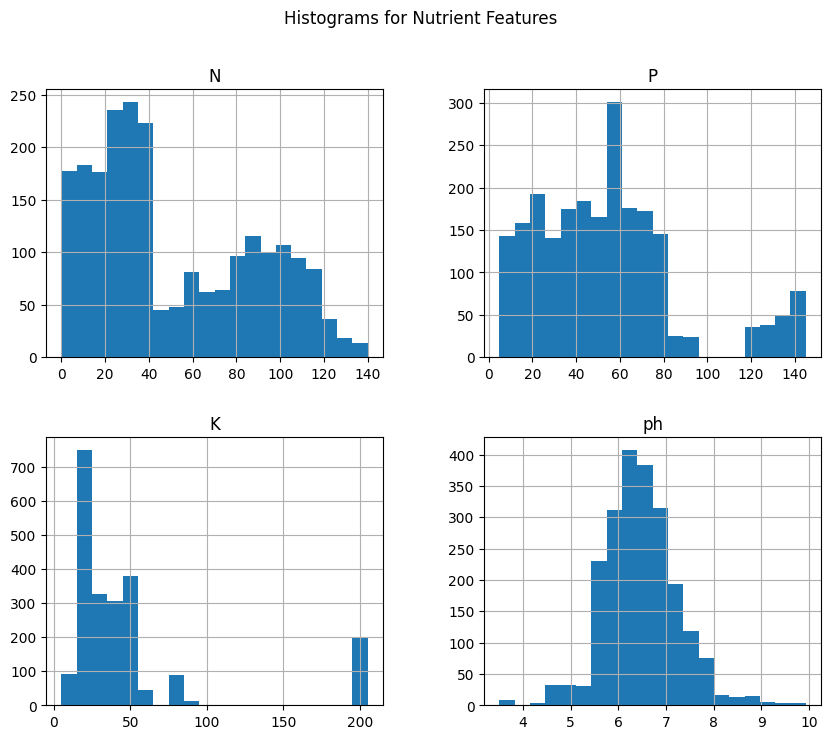

In [156]:
crops.hist(column=['N', 'P', 'K', 'ph'], figsize=(10,8), bins=20)
plt.suptitle("Histograms for Nutrient Features")
plt.show()

**Checking for Outliers using IQR**

In [157]:

numeric_cols = crops.select_dtypes(include=["number"]).columns
numeric_cols = numeric_cols.drop('crop')  # remove target column

Q1 = crops[numeric_cols].quantile(0.25)
Q3 = crops[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

crops_outliers = ((crops[numeric_cols] < (Q1 - 1.5 * IQR)) |
            (crops[numeric_cols] > (Q3 + 1.5 * IQR))).sum() # Why 1.5×IQR? It’s a standard statistical convention that balances sensitivity and robustness.
                                                         #Values beyond this range are “far” from the central 50% of the data.

print("Number of outliers in each numeric feature:")
print(crops_outliers)


Number of outliers in each numeric feature:
N       0
P     138
K     200
ph     57
dtype: int64


**Checking for Outliers using Z-score (standard deviation) method**

In [158]:
numeric_cols = crops.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop('crop')  # remove target column

for col in numeric_cols:
    mean = crops[col].mean()
    std = crops[col].std()
    threshold = 3 #based on the empirical rule (68-95-99.7 rule) in statistics

    outliers = crops[(crops[col] > mean + threshold * std) |
                   (crops[col] < mean - threshold * std)]

    print(f"{col}: {len(outliers)} outliers")

N: 0 outliers
P: 0 outliers
K: 94 outliers
ph: 30 outliers


## **DATA PREPROCESSING**


**Splitting dataset into independent and dependent variable**

In [159]:
X = crops.drop('crop', axis=1)  # Independent variables
y = crops['crop']               # Dependent variable

X, y


(        N   P   K        ph
 0      90  42  43  6.502985
 1      85  58  41  7.038096
 2      60  55  44  7.840207
 3      74  35  40  6.980401
 4      78  42  42  7.628473
 ...   ...  ..  ..       ...
 2195  107  34  32  6.780064
 2196   99  15  27  6.086922
 2197  118  33  30  6.362608
 2198  117  32  34  6.758793
 2199  104  18  30  6.779833
 
 [2200 rows x 4 columns],
 0       20
 1       20
 2       20
 3       20
 4       20
         ..
 2195     5
 2196     5
 2197     5
 2198     5
 2199     5
 Name: crop, Length: 2200, dtype: int64)

 **Splitting the dataset into train and test**

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test    

(       N    P    K        ph
 1607   0   18   14  7.207991
 1212   9  122  201  5.570291
 362   11   71   24  5.606620
 566   38   38   18  6.294130
 1671  18   12    8  6.206053
 ...   ..  ...  ...       ...
 808   13   64   20  6.590571
 422   16   55   19  6.413544
 2052  82   48   36  6.352077
 2083  90   50   44  6.253409
 1282   1  132  200  5.620746
 
 [1760 rows x 4 columns],
         N    P    K        ph
 1609   13   23    6  7.365338
 1072   98   79   50  6.435917
 1912  140   38   15  6.021440
 100    71   54   16  5.749914
 1645   40   22    6  6.488221
 ...   ...  ...  ...       ...
 140    99   56   17  6.234330
 1587    1  135  203  5.624203
 2015   70   38   35  7.014064
 1254   21  134  202  6.425420
 449    36   67   25  6.418063
 
 [440 rows x 4 columns],
 1607    16
 1212     7
 362      9
 566     13
 1671    16
         ..
 808     10
 422     18
 2052     8
 2083     8
 1282     7
 Name: crop, Length: 1760, dtype: int64,
 1609    16
 1072     1
 1912     6
 100

**Feature Scaling**

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-1.37162846, -1.07290957, -0.67351002,  0.93754456],
       [-1.12741063,  2.08451298,  3.01526081, -1.15384595],
       [-1.07314   ,  0.53616154, -0.47624954, -1.10745175],
       ...,
       [ 0.8534673 , -0.1621146 , -0.23953698, -0.15548263],
       [ 1.07054981, -0.10139494, -0.0817286 , -0.28148439],
       [-1.34449314,  2.3881113 ,  2.99553476, -1.08941335]],
      shape=(1760, 4))

## BUILDING THE MODEL 

In [162]:
!pip install xgboost lightgbm catboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


 IMPORTATION OF NECESSARY LIBRARIES

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint, uniform
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

## MODEL BUILDING, HYPERPARAMETER TUNING, MODEL EVALUATION

In [ ]:
param_distributions = { # Hyperparameter search space for each model
    "RandomForest": {
        'n_estimators': randint(200, 1001), # Number of trees in the forest
        'max_depth': randint(10, 31), # Maximum depth of each tree
        'min_samples_split': randint(2, 15), # Minimum samples required to split a node
        'min_samples_leaf': randint(1, 10), # Minimum samples required at each leaf node
        'max_features': ['auto', 'sqrt', 'log2', None], # Number of features to consider for split
        'bootstrap': [True, False] # Whether bootstrap samples are used when building trees
    },
    "XGBoost": {
        'n_estimators': randint(100, 501), # Number of boosting rounds
        'max_depth': randint(3, 15), # Maximum tree depth for base learners
        'learning_rate': uniform(0.01, 0.3), # Step size shrinkage
        'subsample': uniform(0.7, 0.3), # Subsample ratio of the training instances
        'colsample_bytree': uniform(0.7, 0.3) # Subsample ratio of columns when constructing each tree
    },
    "LightGBM": {
        'n_estimators': randint(100, 501), # Number of boosting rounds 
        'max_depth': randint(3, 15), # Maximum tree depth for base learners
        'learning_rate': uniform(0.01, 0.3), # Step size shrinkage
        'num_leaves': randint(20, 100), # Number of leaves in full tree
        'colsample_bytree': uniform(0.7, 0.3) # Subsample ratio of columns when constructing each tree
    },
    "CatBoost": {
        'iterations': randint(100, 501), # Number of boosting iterations
        'depth': randint(3, 10), # Depth of the tree
        'learning_rate': uniform(0.01, 0.3), # Step size shrinkage
        'l2_leaf_reg': uniform(1, 10) # L2 regularization term on weights
    }
}

models = {
    "RandomForest": RandomForestClassifier(random_state=42),# Random Forest Classifier instance for hyperparameter tuning
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),# XGBoost Classifier instance for hyperparameter tuning
    "LightGBM": LGBMClassifier(random_state=42),# LightGBM Classifier instance for hyperparameter tuning
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)# CatBoost Classifier instance for hyperparameter tuning
}

kf = KFold(n_splits=5, shuffle=True, random_state=42) # 5-Fold Cross-Validation setup
results = [] # To store results for each model

for name, model in models.items(): #    Iterate over each model for hyperparameter tuning
    print(f"\nTuning {name}...") #  Indicate which model is being tuned
    
    # Select correct features (scaled or not)
    X_train_model = X_train_scaled if name != "CatBoost" else X_train
    X_test_model = X_test_scaled if name != "CatBoost" else X_test
    
    # Randomized Search CV
    rscv = RandomizedSearchCV(
        estimator=model, # The base model to tune
        param_distributions=param_distributions[name], # Hyperparameter space
        n_iter=50, # Number of random combinations to try
        cv=kf, # Cross-validation strategy
        scoring='f1_weighted', # Evaluation metric
        n_jobs=-1, # Use all available cores
        verbose=1, # Verbosity level
        random_state=42 # For reproducibility
    )
    
    rscv.fit(X_train_model, y_train) # Fit the model with hyperparameter tuning
    
    # Predict on test set
    y_pred = rscv.predict(X_test_model) # Make predictions on the test set
    
    # Evaluate metrics
    acc = accuracy_score(y_test, y_pred) # Accuracy on test set
    f1 = f1_score(y_test, y_pred, average='weighted') # F1 score on test set
    precision = precision_score(y_test, y_pred, average='weighted') # Precision on test set
    recall = recall_score(y_test, y_pred, average='weighted') # Recall on test set
    
    # Store results
    results.append({
        "Model": name, # Model name for identification
        "BestParams": rscv.best_params_, # Best hyperparameters found
        "Accuracy": acc, # Accuracy on test set
        "F1": f1, # F1 score on test set
        "Precision": precision, # Precision on test set
        "Recall": recall # Recall on test set
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="F1", ascending=False)# Sort by F1 score for better comparison
print("\nAll model results:\n", results_df) # Display all model results


Tuning RandomForest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning:


60 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Use


Tuning XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning:

[19:22:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.





Tuning LightGBM...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 4
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from 

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names




Tuning CatBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning:


21 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, s


All model results:
           Model                                         BestParams  Accuracy  \
3      CatBoost  {'depth': 3, 'iterations': 413, 'l2_leaf_reg':...  0.793182   
0  RandomForest  {'bootstrap': False, 'max_depth': 12, 'max_fea...  0.786364   
1       XGBoost  {'colsample_bytree': 0.981565812704725, 'learn...  0.772727   
2      LightGBM  {'colsample_bytree': 0.7718685672000917, 'lear...  0.752273   

         F1  Precision    Recall  
3  0.788551   0.795696  0.793182  
0  0.779396   0.787962  0.786364  
1  0.771879   0.773003  0.772727  
2  0.749436   0.748262  0.752273  


In [164]:
# Summarize and display the results nicely
data = {
    'Model': ['CatBoost', 'RandomForest', 'XGBoost', 'LightGBM'],
    'Accuracy': [0.793182, 0.786364, 0.772727, 0.752273],
    'F1': [0.788551, 0.779396, 0.771879, 0.749436],
    'Precision': [0.795696, 0.787962, 0.773003, 0.748262],
    'Recall': [0.793182, 0.786364, 0.772727, 0.752273]
}

# Create DataFrame
df_results = pd.DataFrame(data)

# Optionally, set Model as index
df_results.set_index('Model', inplace=True)

# Display nicely
print(df_results)

              Accuracy        F1  Precision    Recall
Model                                                
CatBoost      0.793182  0.788551   0.795696  0.793182
RandomForest  0.786364  0.779396   0.787962  0.786364
XGBoost       0.772727  0.771879   0.773003  0.772727
LightGBM      0.752273  0.749436   0.748262  0.752273


**TABLE IMAGE FOR THE RESULT OF ALL MODELS**


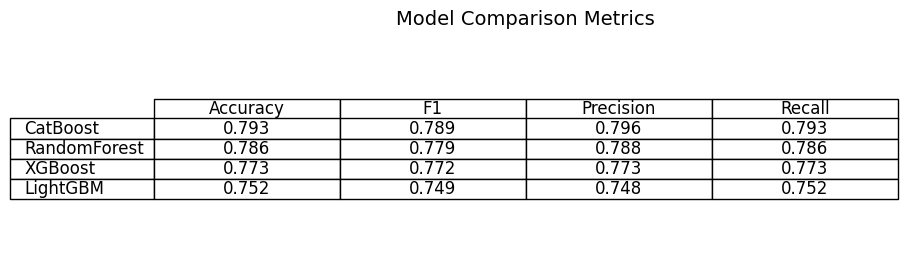

In [182]:


# Your DataFrame
data = {
    'Model': ['CatBoost', 'RandomForest', 'XGBoost', 'LightGBM'],
    'Accuracy': [0.793182, 0.786364, 0.772727, 0.752273],
    'F1': [0.788551, 0.779396, 0.771879, 0.749436],
    'Precision': [0.795696, 0.787962, 0.773003, 0.748262],
    'Recall': [0.793182, 0.786364, 0.772727, 0.752273]
}

df = pd.DataFrame(data).set_index('Model')

# Create figure
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')  # Remove axes

# Create table in figure
table = ax.table(cellText=df.round(3).values,
                 colLabels=df.columns,
                 rowLabels=df.index,
                 cellLoc='center',
                 loc='center')

# Styling
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title("Model Comparison Metrics", fontsize=14)


# Show figure
plt.show()


**BARPLOT FOR FOR MODEL METRICS COMPARISON**

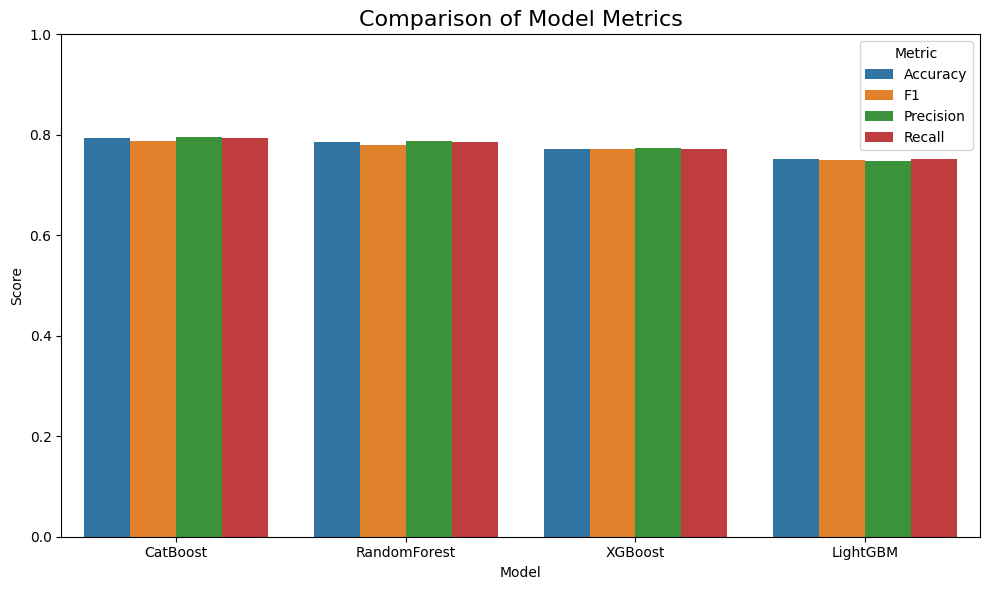

In [175]:


# Your DataFrame
data = {
    'Model': ['CatBoost', 'RandomForest', 'XGBoost', 'LightGBM'],
    'Accuracy': [0.793182, 0.786364, 0.772727, 0.752273],
    'F1': [0.788551, 0.779396, 0.771879, 0.749436],
    'Precision': [0.795696, 0.787962, 0.773003, 0.748262],
    'Recall': [0.793182, 0.786364, 0.772727, 0.752273]
}

df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melt = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set figure size
plt.figure(figsize=(10,6))

# Barplot
sns.barplot(data=df_melt, x='Model', y='Score', hue='Metric')

# Styling
plt.ylim(0, 1)  # since metrics are between 0 and 1
plt.title('Comparison of Model Metrics', fontsize=16)
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.tight_layout()



# Show plot
plt.show()


 NOTE: **The CATBoost is the Best Model based on the Metric Score**

In [180]:
for metric in df.columns:
    best_model = df[metric].idxmax()
    best_value = df[metric].max()
    print(f"Best model for {metric}: {best_model} ({best_value:.3f})")

Best model for Accuracy: CatBoost (0.793)
Best model for F1: CatBoost (0.789)
Best model for Precision: CatBoost (0.796)
Best model for Recall: CatBoost (0.793)


**VISUALIZING THE BEST MODEL ACROSS ALL PERFORMANCE METRICS**

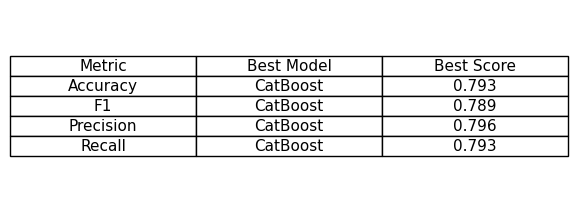

In [167]:

# Data
df = pd.DataFrame({
    'Model': ['CatBoost', 'RandomForest', 'XGBoost', 'LightGBM'],
    'Accuracy': [0.793182, 0.786364, 0.772727, 0.752273],
    'F1': [0.788551, 0.779396, 0.771879, 0.749436],
    'Precision': [0.795696, 0.787962, 0.773003, 0.748262],
    'Recall': [0.793182, 0.786364, 0.772727, 0.752273]
}).set_index('Model')

# Compute best models
best_rows = {metric: df[metric].idxmax() for metric in df.columns}
best_values = {metric: df[metric].max() for metric in df.columns}

summary_df = pd.DataFrame({
    "Metric": list(best_rows.keys()),
    "Best Model": list(best_rows.values()),
    "Best Score": [round(v, 3) for v in best_values.values()]
})

# Plot table
fig, ax = plt.subplots(figsize=(6, 2.5))
ax.axis('off')

table = ax.table(
    cellText=summary_df.values,
    colLabels=summary_df.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.2)


# Show figure
plt.show()


## **FEATURE IMPORTANCE**

  Feature  Importance
2       K   35.723028
1       P   27.772609
0       N   25.170589
3      ph   11.333774


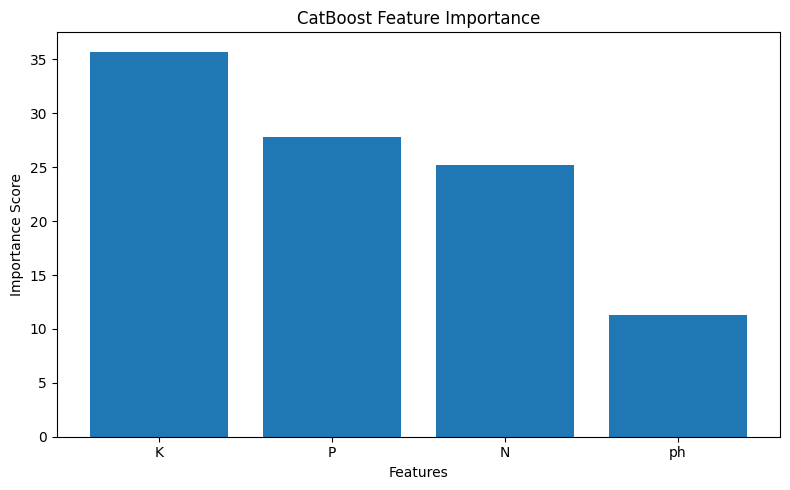

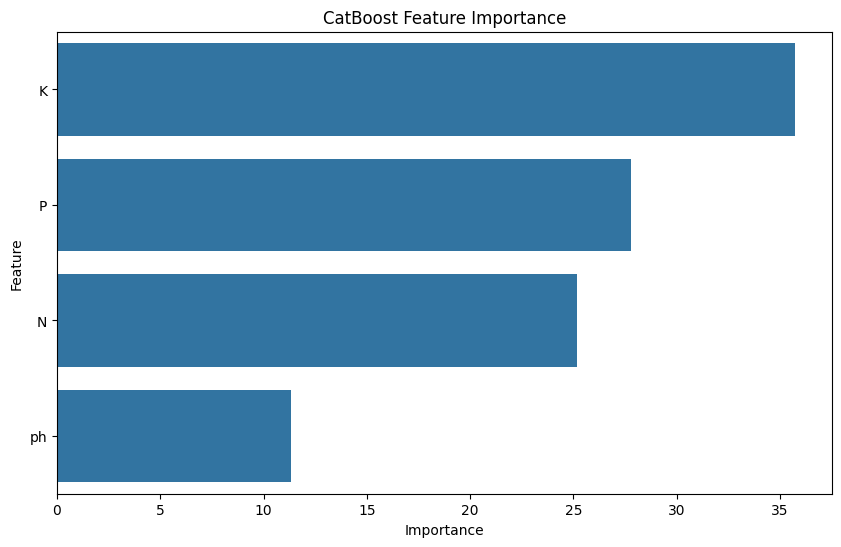

In [168]:
# Extract the best CatBoost model from RandomizedSearchCV
best_catboost = rscv.best_estimator_

# Get feature importance
feature_importances = best_catboost.get_feature_importance(
    type='FeatureImportance'  # Other options: 'PredictionValuesChange', 'LossFunctionChange', 'ShapValues'
)

# If you have feature names (X_train or X_train_scaled columns)
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]

# Create a DataFrame to visualize feature importance
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(fi_df)

# Your feature importance data
data = {
    "Feature": ["K", "P", "N", "ph"],
    "Importance": [35.723028, 27.772609, 25.170589, 11.333774]
}

df = pd.DataFrame(data)

# Sort for a nicer plot (optional)
df = df.sort_values(by="Importance", ascending=False)


# Plot
plt.figure(figsize=(8,5))
plt.bar(df["Feature"], df["Importance"])
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("CatBoost Feature Importance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title("CatBoost Feature Importance")
plt.show()




**TABLE IMAGE FOR FEATURE IMPORTANCE**

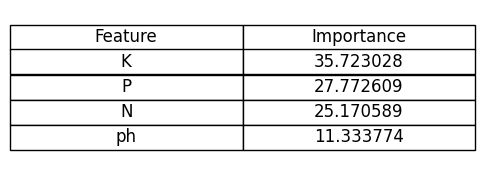

Saved as feature_importance_table.png


In [170]:
data = {
    "Feature": ["K", "P", "N", "ph"],
    "Importance": [35.723028, 27.772609, 25.170589, 11.333774]
}

df = pd.DataFrame(data)

# Create the figure
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes

# Create table
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    loc='center',
    cellLoc='center'
)

# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(12)

# Adjust column width
table.scale(1, 1.5)


plt.show()

print("Saved as feature_importance_table.png")

**CLASSIFICATION REPORT OF THE MODEL** 

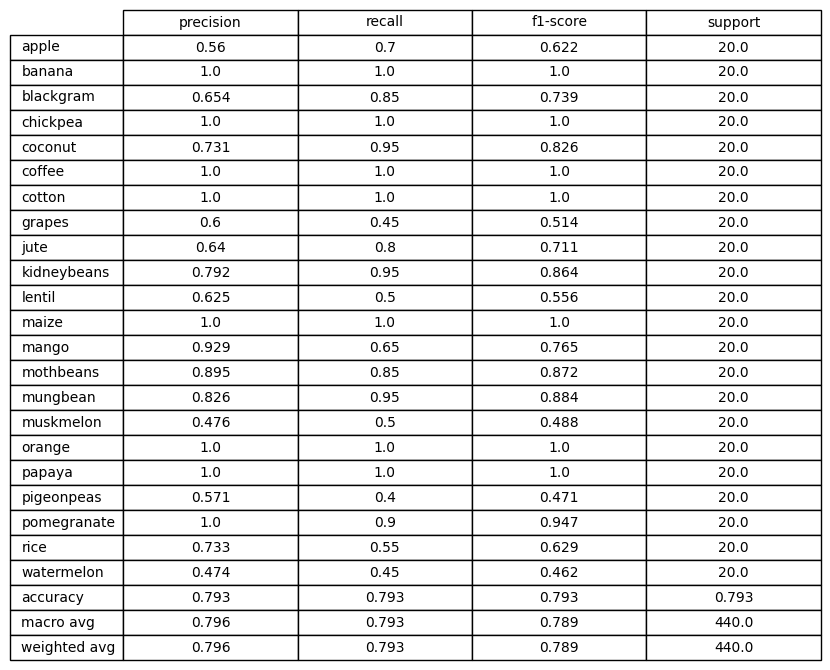

In [171]:


# 1. Generate the classification report as a DataFrame
report = classification_report(y_test, y_pred, output_dict=True, target_names=le.classes_.astype(str))
report_df = pd.DataFrame(report).transpose()

# 2. Plot the DataFrame as a table
fig, ax = plt.subplots(figsize=(9, 4))
ax.axis('off')

table = ax.table(
    cellText=report_df.round(3).values,
    colLabels=report_df.columns,
    rowLabels=report_df.index,
    loc='center',
    cellLoc='center'
)

# Make text readable
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)



plt.show()




**SAVING THE MODEL**

In [172]:
import joblib
import os

# Ensure the filename is valid and path exists
filename = "best_model.pkl"

# Optional: save to a safe folder like current working directory
save_path = os.path.join(os.getcwd(), filename)

joblib.dump(rscv.best_estimator_, save_path)
print(f"Model saved as '{save_path}'")


Model saved as 'g:\Other computers\My Laptop\Desktop\PYTHON SANDBOX\best_model.pkl'
